In [1]:
import logging
import warnings
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd
import numpy as np
from pathlib import Path
from gensim.models import Word2Vec
from sklearn.manifold import TSNE

# Setting up the loggings to monitor gensim
logging.basicConfig(format="%(levelname)s - %(asctime)s: %(message)s", datefmt= '%H:%M:%S', level=logging.INFO)
warnings.filterwarnings('ignore')

In [2]:
input = './data/models/corpus.csv.xz'
df = pd.read_csv(input, compression='xz')

In [3]:
sent = [sentence.split() for sentence in df['titulo']]
model = Word2Vec(sent, min_count=1, size= 50,workers=3, window =3, sg = 1)

WARNING - 21:57:03: consider setting layer size to a multiple of 4 for greater performance
INFO - 21:57:03: collecting all words and their counts
INFO - 21:57:03: PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
INFO - 21:57:03: PROGRESS: at sentence #10000, processed 108870 words, keeping 12309 word types
INFO - 21:57:03: PROGRESS: at sentence #20000, processed 215608 words, keeping 18506 word types
INFO - 21:57:03: PROGRESS: at sentence #30000, processed 322839 words, keeping 22854 word types
INFO - 21:57:03: PROGRESS: at sentence #40000, processed 429054 words, keeping 26884 word types
INFO - 21:57:03: PROGRESS: at sentence #50000, processed 537761 words, keeping 30590 word types
INFO - 21:57:03: PROGRESS: at sentence #60000, processed 648190 words, keeping 34182 word types
INFO - 21:57:04: PROGRESS: at sentence #70000, processed 755849 words, keeping 36858 word types
INFO - 21:57:04: PROGRESS: at sentence #80000, processed 864893 words, keeping 39814 word types
INF

### T-SNE Plot

INFO - 21:57:57: precomputing L2-norms of word weight vectors


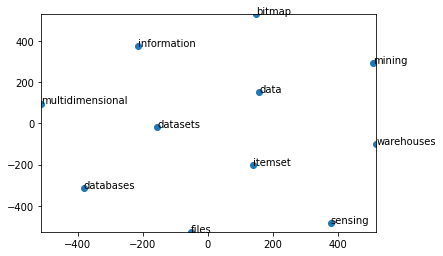

In [4]:
def display_closestwords_tsnescatterplot(model, word, size):
    
    arr = np.empty((0,size), dtype='f')
    word_labels = [word]

    close_words = model.similar_by_word(word)

    arr = np.append(arr, np.array([model[word]]), axis=0)
    for wrd_score in close_words:
        wrd_vector = model[wrd_score[0]]
        word_labels.append(wrd_score[0])
        arr = np.append(arr, np.array([wrd_vector]), axis=0)
        
    tsne = TSNE(n_components=2, random_state=0)
    np.set_printoptions(suppress=True)
    Y = tsne.fit_transform(arr)

    x_coords = Y[:, 0]
    y_coords = Y[:, 1]
    plt.scatter(x_coords, y_coords)

    for label, x, y in zip(word_labels, x_coords, y_coords):
        plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')

    plt.xlim(x_coords.min()+0.00005, x_coords.max()+0.00005)
    plt.ylim(y_coords.min()+0.00005, y_coords.max()+0.00005)
    plt.show()

query = 'data'
display_closestwords_tsnescatterplot(model, query, 50)

In [5]:
path = './data/models/'
Path(path).mkdir(exist_ok=True)
model_file = '%sword2vec.model' % path

model.wv.save_word2vec_format(model_file, binary=True)

INFO - 21:57:59: storing 60803x50 projection weights into ./data/models/word2vec.model
